# Getting started with Jupyter Notebooks

Welcome to Jupyter Notebooks!

Jupyter Notebooks are a mix of notes, Python code and visualizations, all in the same document.
That's helpful for various reasons.
You can prototype or experiment with machine learning models, add notes for yourself, or share your notebooks with others.

## How do I create a new notebook?

So, you want to start experimenting with notebooks.
Jupyter Notebooks run in your browser, which means everything you create is secure and private.
By default you can view your existing notebooks or create new ones at [http://localhost:8888](http://localhost:8888).
You can use this interface to navigate through directories, or upload or create new notebooks, from just above the list of files.

## What are cells?

Everything in a Jupyter Notebook is split into cells.
_This_ is a cell, with notes written in Markdown.
Apart from Markdown, the cell can also contain Python code.
There's just one catch: each cell can only contain Markdown or Python code, not both.
You can change the cell type from the `Cell ⇒ Cell Type` menu.

To insert a new cell, use `Insert` menu.
You can also change or delete cells from the `Edit` menu, or use the toolbar for easier access.
If you want to edit the contents of cells, press `Enter` while they are highlighted, or double-click on them.

## What is Markdown?

This cell is written in Markdown.
Markdown is an easy-to-learn markup language that gives you simple formatting options for plain text.
For example, we can use Markdown to write text in **bold**, _italics_, or add `code snippets`.

Markdown is also helpful to organize your notes.
This cell, for example, starts with a second-level heading.
You can create deeper headings by adding more _#_s.

In addition to the basics, you can also add URLs, such as images, lists and [this link (to a Markdown cheat sheet)](https://www.markdownguide.org/cheat-sheet/).

> Tip: double-click on this cell to see how the text is formatted.

## How do I run cells?

There are a few different ways of running cells.
The easiest way is to use the `Cell` menu or by clicking on the `Run` icon.
The quicker way is to learn the keyboard shortcuts (from the toolbar or from the `Help` menu): press `Ctrl+Enter` to run a cell, or `Shift+Enter` to run a cell and select the next one.

> Tip: after running notebooks, remember to save from the `File` menu, or press `Ctrl+S`.

## Why use notebooks instead of scripts?

Normally, you would write your code in a `.py` script and execute it every time you changed part of it.
Say that the script performs two tasks: training a classification model and then visualizing the output.
Every time you tweak the visualization, the script has to re-train the model before showing you the visualization.

That's inconvenient: training a model can sometimes take a long time, and we wouldn't want to waste time waiting for the visualization to load.
With Jupyter Notebook, you can separate the task into cells, each performing a different task.
Each cell has the output from previous cells available to it.

1. Load the dataset; we only need to run this cell once.
2. Train the model; we also run this cell once, and then the notebook remembers the model.
2. Visualize the model in some way.

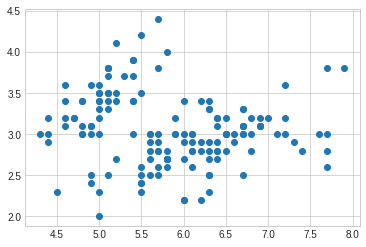

In [1]:
# step 1: load the dataset

from sklearn import datasets # import the dataset module
X, y = datasets.load_iris(return_X_y=True) # import the Iris dataset: the features (`X`) and the labels (`y`)
X = X[:, :2] # keep all rows, but only two columns/features (so it's easier to visualize in 2D)

# visualize the data we have so far
import matplotlib.pyplot as plt # import matplotlib (we'll see more about this in the next notebook)
plt.style.use('seaborn-whitegrid') # change the style because no one likes an ugly visualization
plt.scatter(X[:, [ 0 ]], X[:, [ 1 ]], color='C0') # draw the points
plt.show() # show the visualization

In [2]:
# step 2: train the K-Means clustering model

from sklearn.cluster import KMeans # import the K-Means clustering algorithm
kmeans = KMeans(n_clusters=2) # instantiate the model with K = 2 (the hyperparameter)
kmeans.fit(X) # fit the clustering algorithm (we're using the `X` from the previous cell)
kmeans.labels_ # the cluster labels: one per flower

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

Now that we have trained the K-Means algorithm, we can access its labels (`kmeans.labels_`) (which tell us to which cluster each flower belongs) from any code cell.
The next step is to visualize this data.
We can tweak the visualization for as long as we want without having to re-train the model.
Neat.

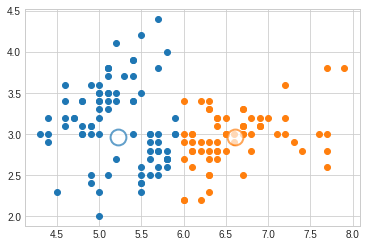

In [3]:
# step 3: visualize!
# (there's no need to import matplotlib: we already imported it above)

# plot the first cluster (the points that have a label 0)
cluster_1 = X[[ label == 0 for label in kmeans.labels_ ]] # get the points in cluster 1 (which have label 0)
plt.scatter(cluster_1[:, [ 0 ]], cluster_1[:, [ 1 ]], color='C0', marker='o') # plot the data from the first cluster
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], # plot the first cluster's centroid
            edgecolor='C0', linewidth=2, color='#FFFFFF', alpha=0.7, marker='o', s=250)

# plot the second cluster (the points that have a label 1)
cluster_2 = X[[ label == 1 for label in kmeans.labels_ ]] # get the points in cluster 1 (which have label 1)
plt.scatter(cluster_2[:, [ 0 ]], cluster_2[:, [ 1 ]], color='C1', marker='o') # plot the data from the second cluster
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], # plot the second cluster's centroid
            edgecolor='C1', linewidth=2, color='#FFFFFF', alpha=0.7, marker='o', s=250)

plt.show() # show the visualization

That's more convenient, isn't it?
Once you're satisfied with the output, you can copy the code back into a script if need be.

## How do I install and run Jupyter Notebook?

### pip (Linux)

Installing Jupyter Notebook is very easy.
On Linux, install Jupyter notebook using `pip`: `pip install jupyter`.
You can also install Jupyter Notebook in virtual environments, or using `conda`, for example.
Check out the different ways of installing Jupyter Notebook [here](https://jupyter.readthedocs.io/en/latest/install/notebook-classic.html).

To run these Jupyter Notebooks, navigate (using `cd`) to this folder from a terminal and run `jupyter notebook`, which will launch a window in your default browser.
Open the notebook you want to run to get a window like this.

If you prefer a GUI workflow, you can also install Anaconda, described next.

### Anaconda (Windows, MacOS or Linux)

On Windows and MacOS (and even Linux), you can install Anaconda, a data science toolkit that comes pre-packaged with Jupyter Notebook.
Learn more about Anaconda and download it [here](https://www.anaconda.com/).
To run Jupyter Notebooks from Anaconda, open the toolkit and launch Jupyter Notebook.
Just like before, find the notebook, click on it and run normally.

## Resources

- [Jupyter Notebook installation guide](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)
- [More information about Jupyter Notebook's features](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)
- [Markdown basics](https://www.markdownguide.org/getting-started/) and [cheat sheet](https://www.markdownguide.org/cheat-sheet/)
- [Information about and download links for Anaconda](https://www.anaconda.com/)